In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
### Importing Extra Dependencies 


import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mannwhitneyu
from sklearn.neighbors import NearestNeighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
### Importing my Dataset

df = pd.read_csv("Material.csv")

In [4]:
### Checking DataSet and its variable

df.head()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                  486.42                  180.60               21.26   
1                  133.32                  260.14              185.60   
2                  559.97                    2.84              111.76   
3                  391.43                  351.05               76.39   
4                  394.78                  352.61              194.35   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0          201.66             16.11              1151.17              708.50   
1          175.99              6.27              1090.57             1010.25   
2          295.23             11.95              1024.93              810.69   
3          299.14             19.00              1134.88              881.34   
4          235.54             17.02              1098.24              781.01   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
1                       28.86                     59.80  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07

In [5]:
### Checking Dataset Details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [6]:
### Checking Null values 

df.isnull().sum()

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
### Checking for Null Values 

df.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

###  We Can Droop the null values becasue Null values as null values containes less than 2% of entire dataset

In [9]:
# Check for duplicate rows in the DataFrame
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6134    False
6135    False
6136    False
6137    False
6138    False
Length: 6030, dtype: bool


In [10]:
# Drop the duplicated rows from the DataFrame
df.drop_duplicates(inplace=True)

In [11]:
df.describe()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
count             6005.000000             6005.000000         6005.000000   
mean               383.293494              196.765204          112.321932   
std                150.175076              133.544364           74.043089   
min                124.440000                0.000000            0.000000   
25%                255.420000               77.820000           45.610000   
50%                376.820000              192.180000          115.540000   
75%                511.200000              308.470000          174.420000   
max                658.800000              438.470000          244.120000   

       Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
count     6005.000000       6005.000000          6005.000000   
mean       224.412276         17.658058           998.922931   
std         41.589582         11.708399            97.775814   
min        148.600000          0.000000           821.540000   
25%        190.600000          7.870000           918.530000   
50%        225.700000         16.380000           998.600000   
75%        257.630000         27.720000          1080.070000   
max        301.340000         39.280000          1174.360000   

       Refined Aggregator  Formulation Duration (hrs)  \
count         6005.000000                 6005.000000   
mean           811.755910                  174.913577   
std            112.963436                  112.356048   
min            609.230000                   16.250000   
25%            716.920000                   71.000000   
50%            810.430000                  164.030000   
75%            905.540000                  273.260000   
max           1018.050000                  380.250000   

       Compression Strength MPa  
count               6005.000000  
mean                  56.745674  
std                   16.145098  
min                    2.610000  
25%                   46.960000  
50%                   59.700000  
75%                   69.760000  
max                   92.510000

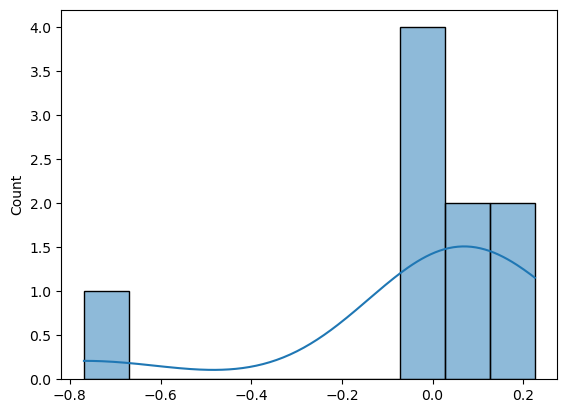

In [12]:
### Checking the Dataset Skewness 

sns.histplot(df.skew(), kde= True)
plt.show()

## Dataset is not normall distributed 

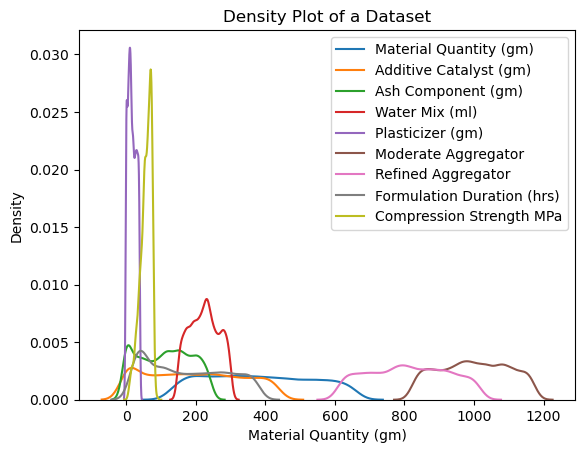

In [13]:
### Ploting the Dataset Distribution to check every density and 

for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.title("Density Plot of a Dataset")
plt.legend()
plt.show()

In [14]:
## Material Quantity (gm) --> This components used to check amount of cement is used in the mixture.
## 'Additive Catalyst (gm)' -->It refers susbbtannce like calcium and check the mixture with cement.
## Ash Component (gm)' --> Its a fly ash, Genrally a mixture in cement to increase its hold capacity.
## Water Mix (ml)' --> Its a amount of water added to the mixture 
## Plasticizer (gm) --> Its genrally added to the mixture to improve mixture workability
## Refined Aggregator',--> This is also added to the mixture to o improve its workability 
## Moderate Aggregator --> It include meterial like sand which help to improve the mixture strength and durability.
## Formulation Duration (hrs)' --> Its a total required to prepare that mixture to be stiff
## Compression Strength MPa  ---> This component refers to the amount of pressure the cement mixture can withstand before breaking or failing.

### As per the Above Variables Study its look like --->> Compression Strength MPa  <<--- will be the optimum choice for dependent variable becasue This variable represents the strength of the cement, which could be influenced by the other variables listed, such as the material quantity, water mix, and additives

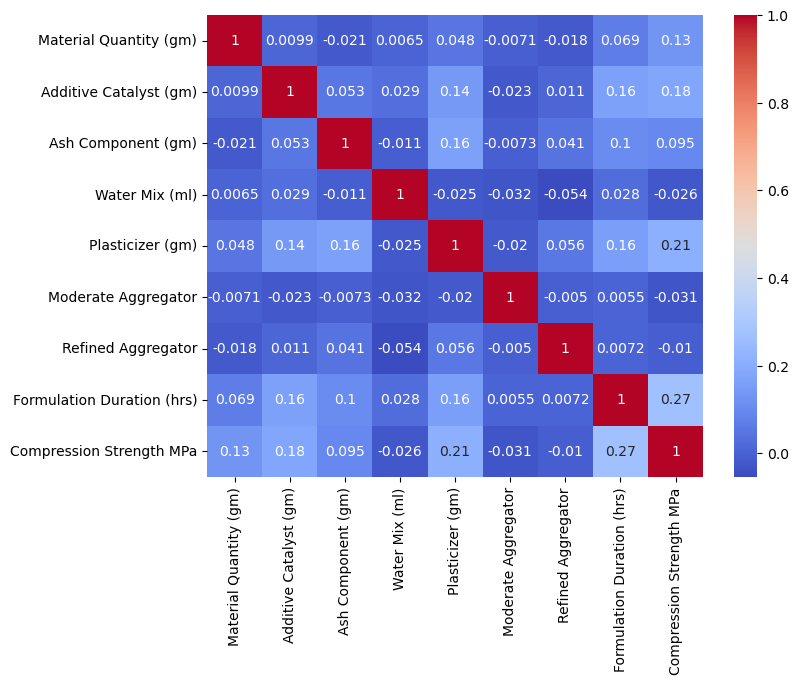

In [15]:
### Checking Independent & dependent variables Correlation 

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True,cmap="coolwarm")
plt.show()

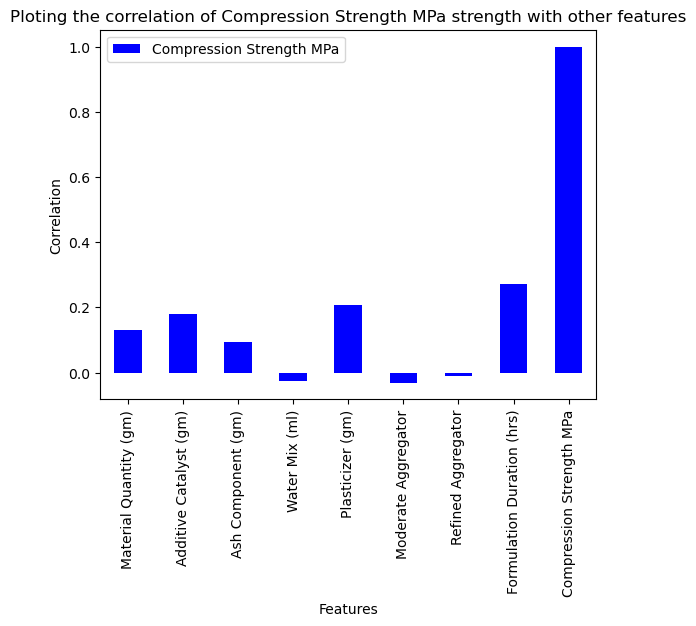

In [16]:
# Correaltion of concrete_compressive_strength with other variable and ploting a graph

df.corr()["Compression Strength MPa"].plot(kind ="bar", color ="blue")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Ploting the correlation of Compression Strength MPa strength with other features")
plt.legend()
plt.show()

### Observations

1. Formulation Duration (hrs) & Plasticizer (gm) have a Higest Correlation with Compression Strength MPa
2. Water Mix (ml) & Moderate Aggregator have a negative correlation with Compression Strength MPa
3. And Rest have a Least Correlation with Compression Strength MPa

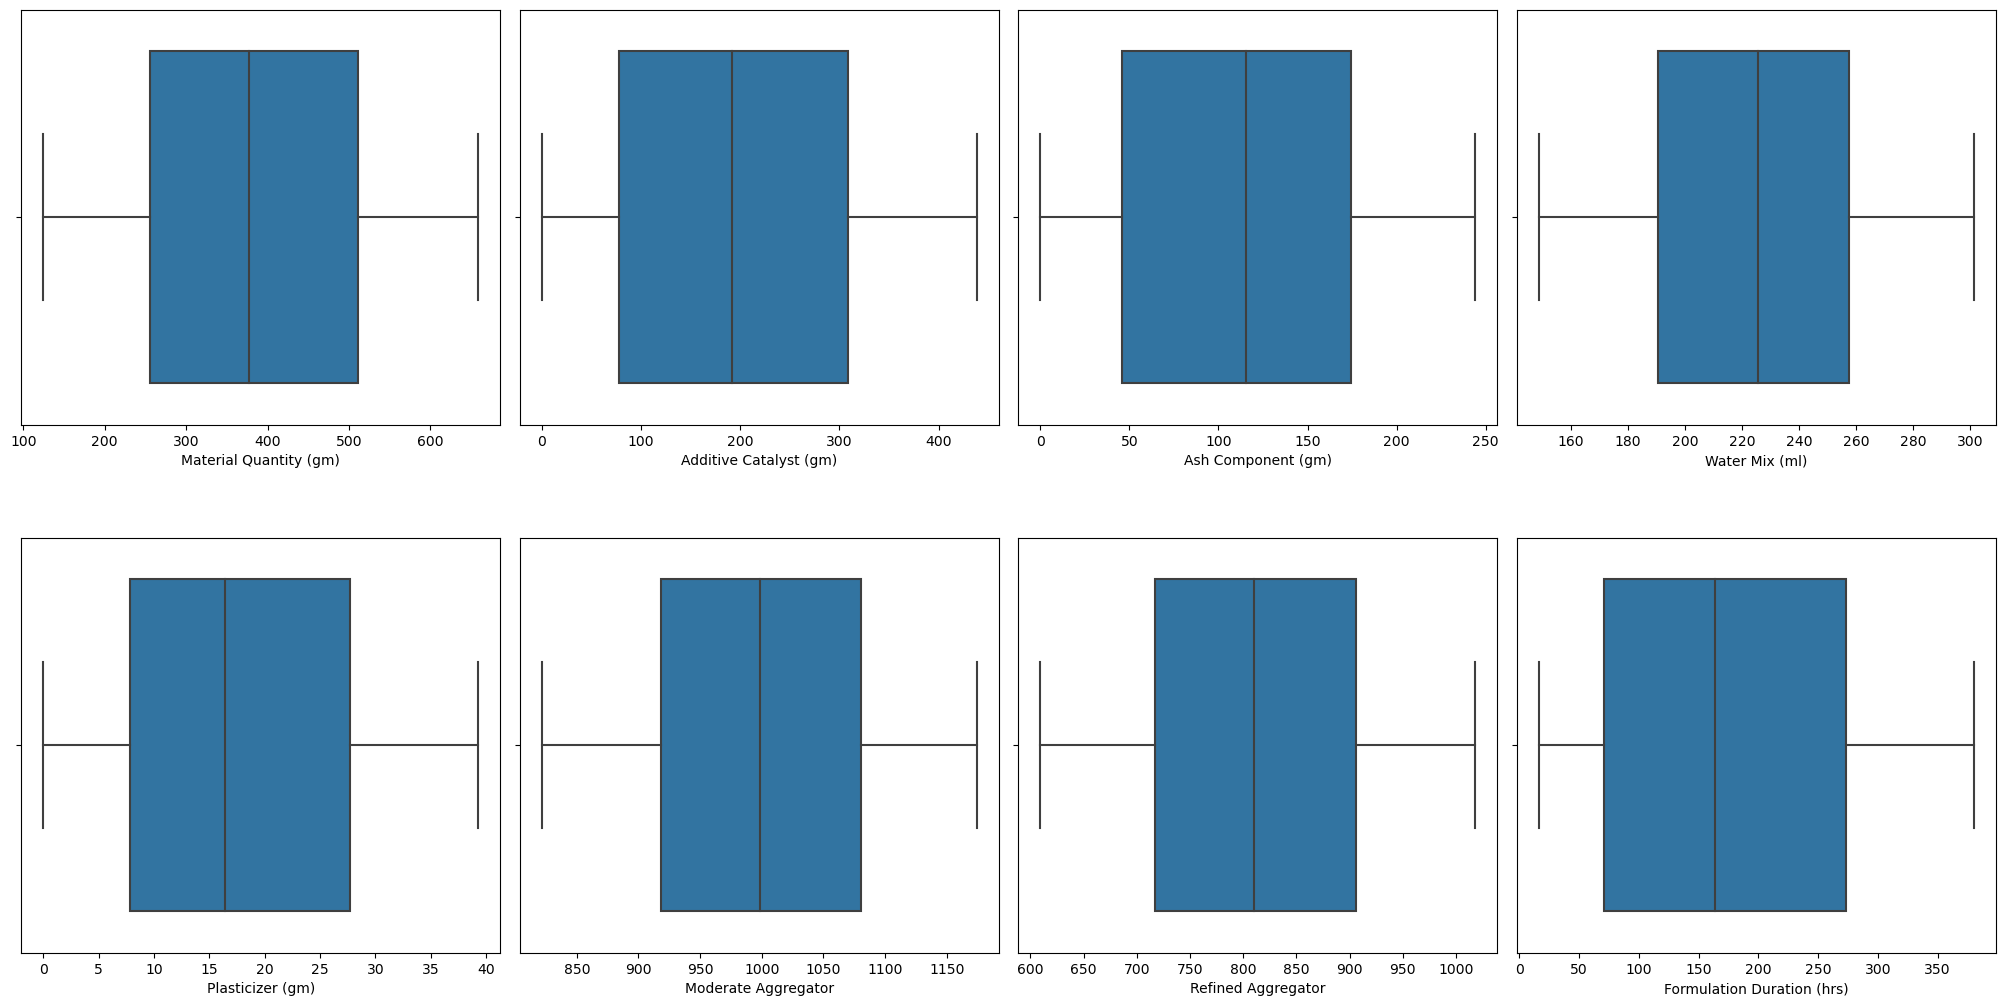

In [17]:
### Checking For outliers 

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in df.columns:
    if col != "Compression Strength MPa":
        sns.boxplot(x=col, data=df,ax=ax[index])
        
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

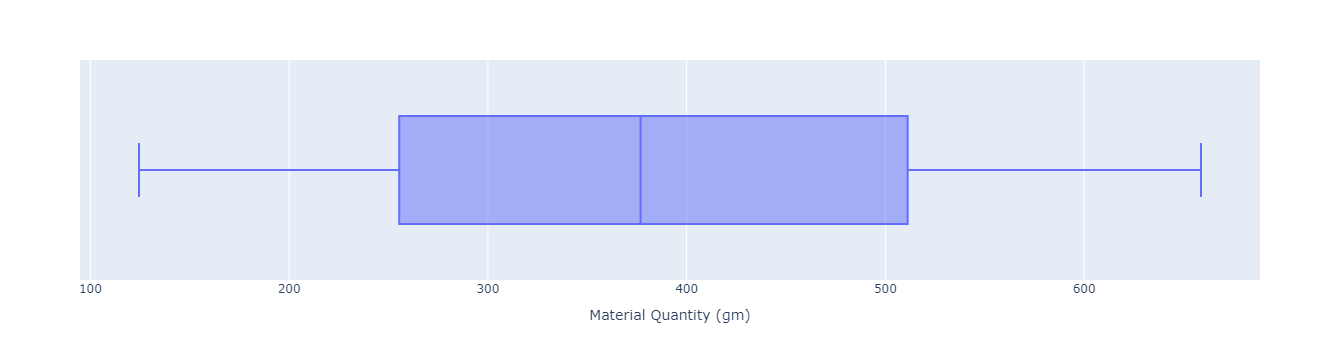

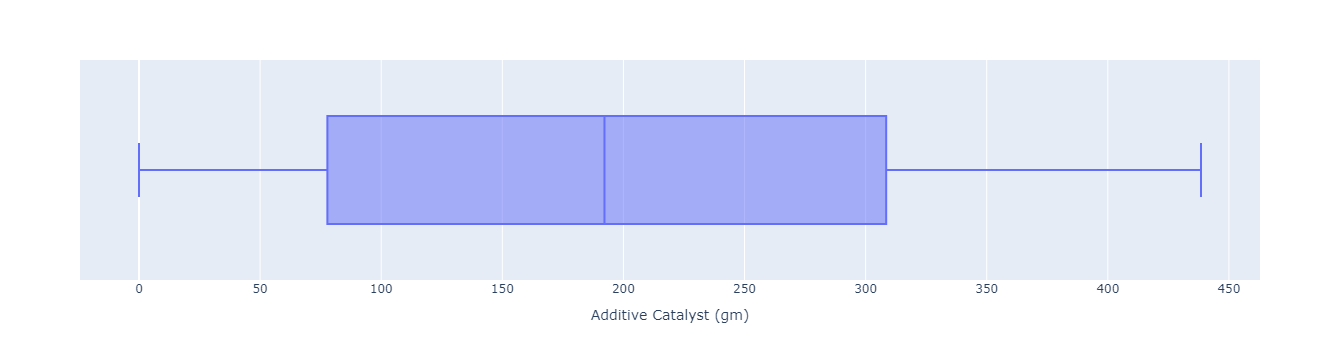

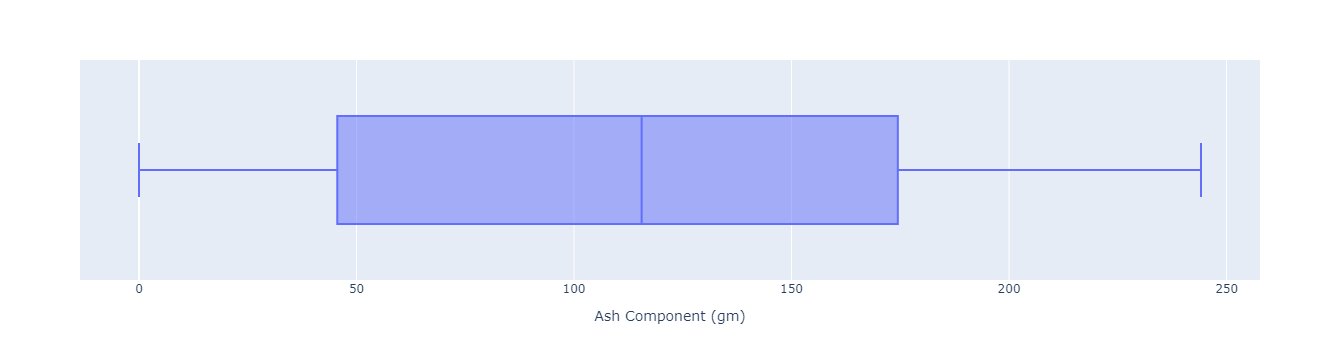

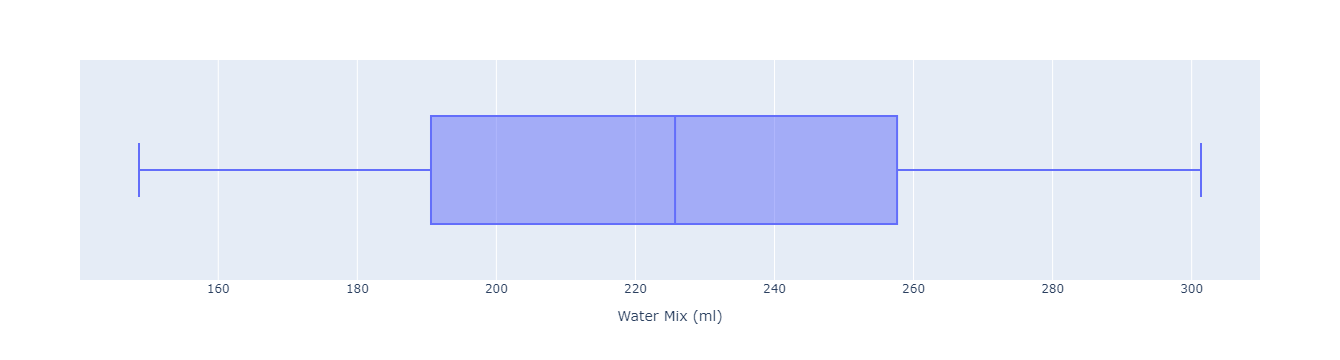

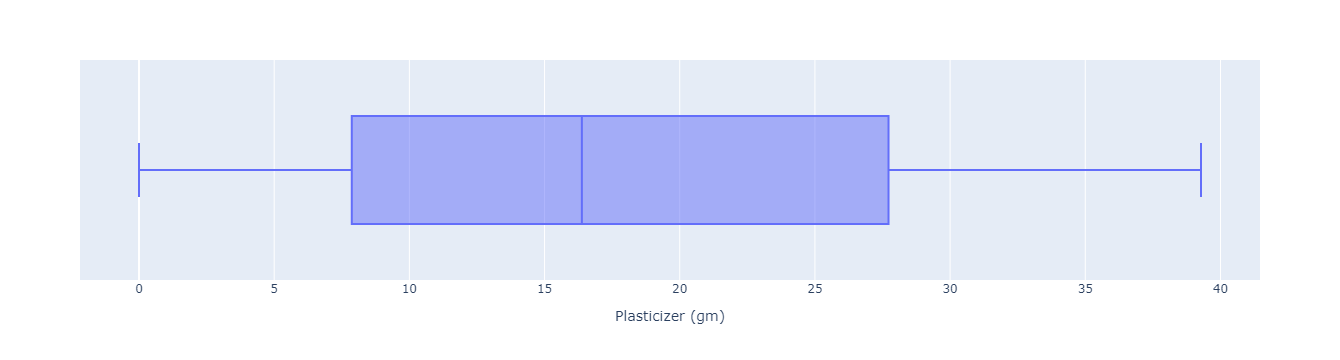

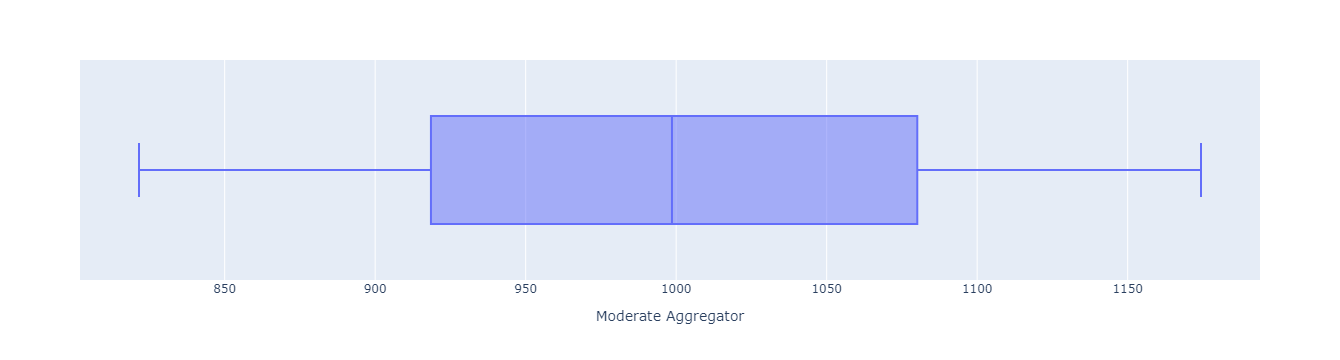

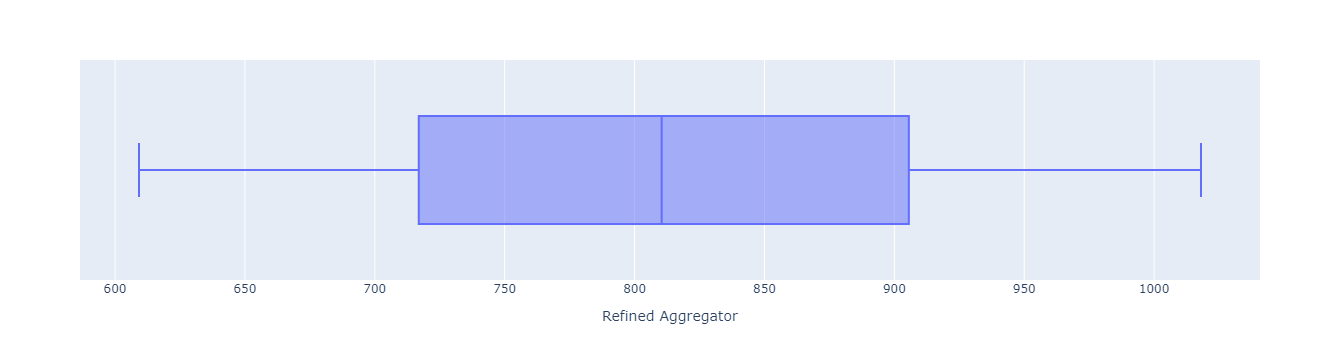

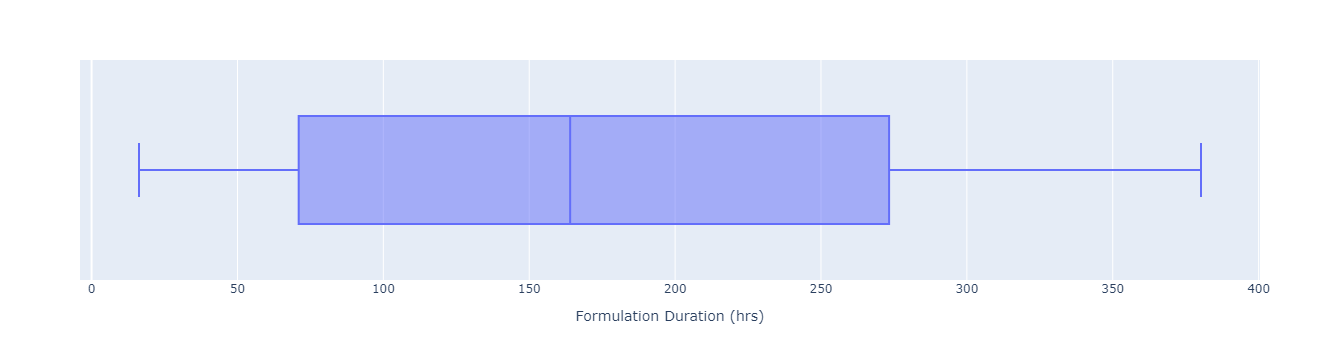

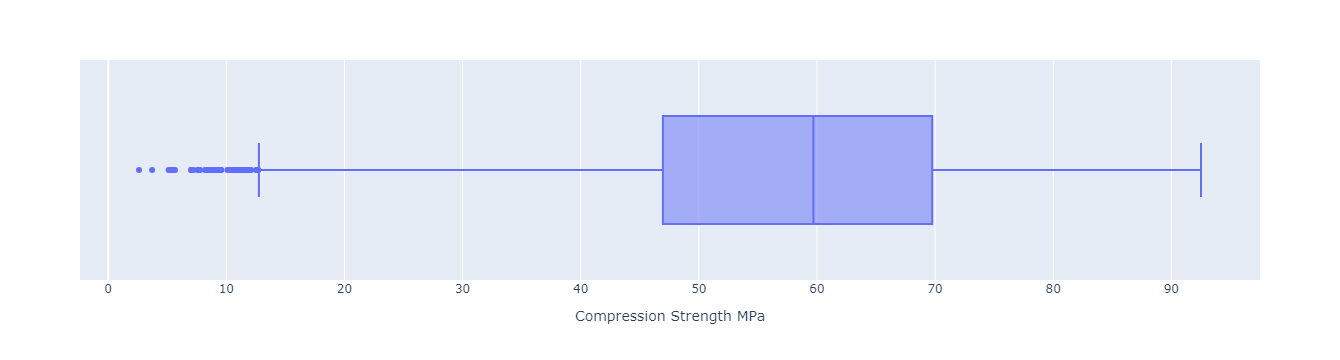

In [18]:
for col in df.columns:
        fig =px.box(data_frame= df, x= col)
        fig.show()

## Observation --> Data have some outliers so utilizing outliers removal technique

## Feature Engenerring & Feature Selection 

In [19]:
### Checking for Discret ,Time Feature & Continus Feature from my dataset 

discrete_cols = []
time_cols = []
continuous_cols = []

for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values < 10:
        discrete_cols.append(col)
    elif df[col].dtype == 'datetime64[ns]':
        time_cols.append(col)
    else:
        continuous_cols.append(col)
print("Discrete feature columns:")
print(discrete_cols)
print()
print("Time feature columns:")
print(time_cols)
print()
print("Continuous feature columns:")
print(continuous_cols)

Discrete feature columns:
[]

Time feature columns:
[]

Continuous feature columns:
['Material Quantity (gm)', 'Additive Catalyst (gm)', 'Ash Component (gm)', 'Water Mix (ml)', 'Plasticizer (gm)', 'Moderate Aggregator', 'Refined Aggregator', 'Formulation Duration (hrs)', 'Compression Strength MPa']


In [20]:
from sklearn.cluster import DBSCAN

### Statistic Outliers detection technique will not work properly here because data is too noisy and non linearly distributed , So applying Non statistical outlier detection approach

In [21]:
### Checking for outliers using DBSCAN Outlier detection 

# Applying MinMaxScaler to scale the data


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
outliers = df[clusters == -1]

In [22]:
outliers.shape

(20, 9)

In [23]:
outliers.head()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
16                    130.30                  425.88               16.72   
570                   241.25                  275.33               25.34   
913                   534.29                  297.44              236.79   
1524                  207.13                  270.74               66.33   
1713                  545.03                  328.94              142.54   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
16            195.52              1.17              1086.77   
570           246.47             35.34               826.78   
913           185.86             12.65               849.17   
1524          295.50             21.33               840.68   
1713          246.42             35.42              1104.22   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
16                654.88                      339.60                     59.30  
570               730.12                      326.49                     27.99  
913               869.71                      216.05                      5.66  
1524              628.37                      378.29                     74.69  
1713              929.39                       52.73                     15.43

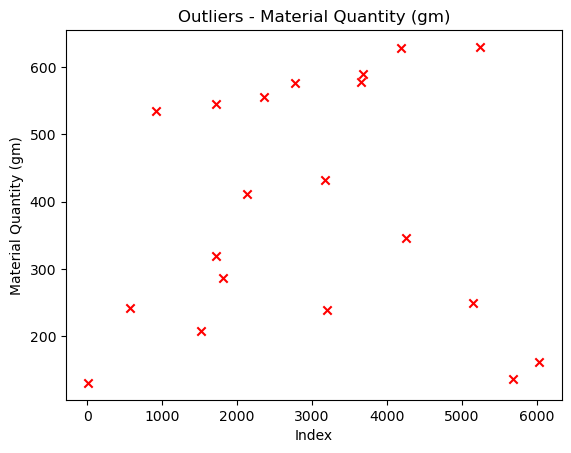

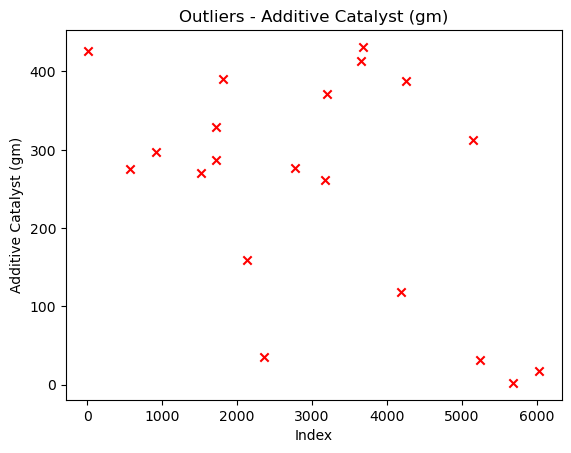

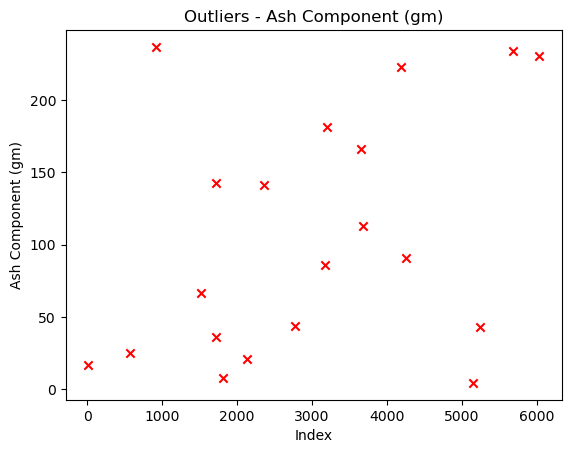

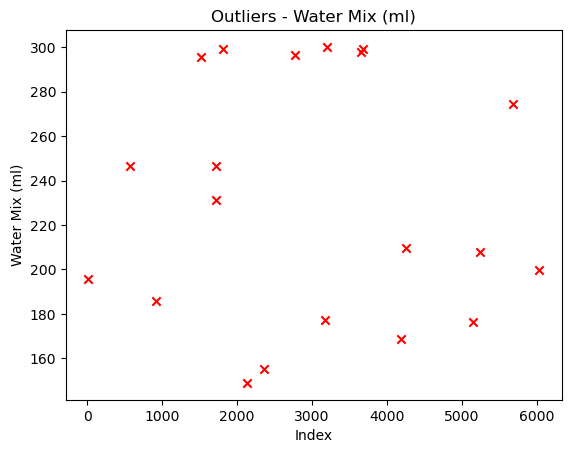

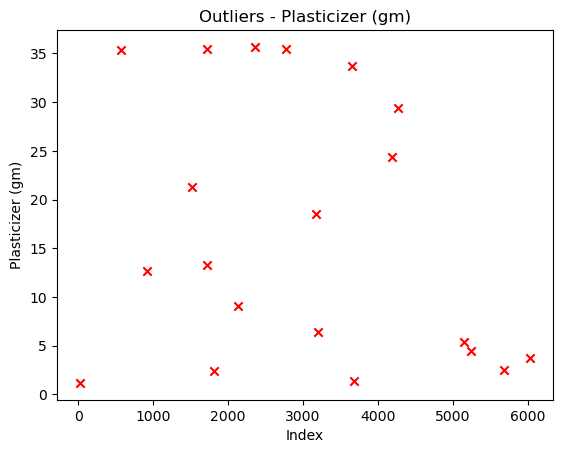

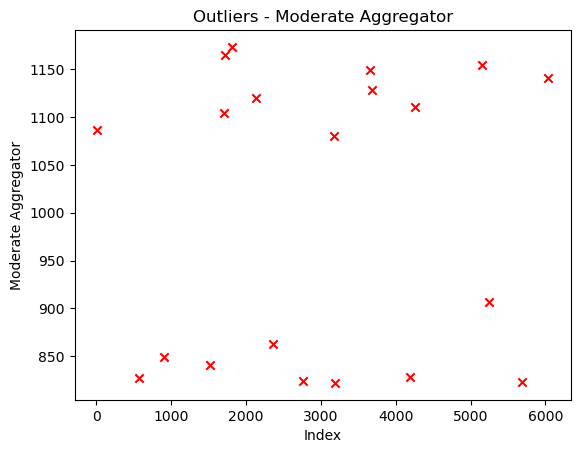

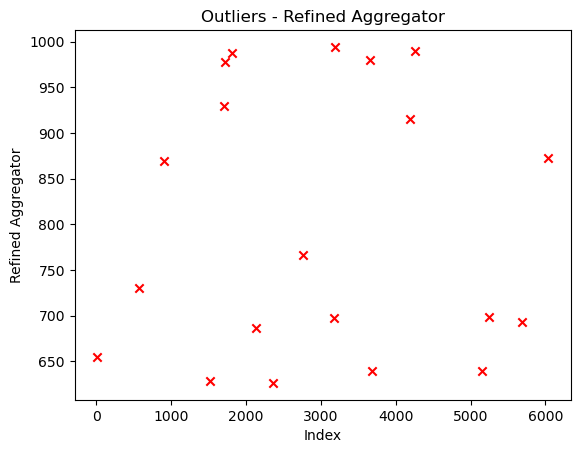

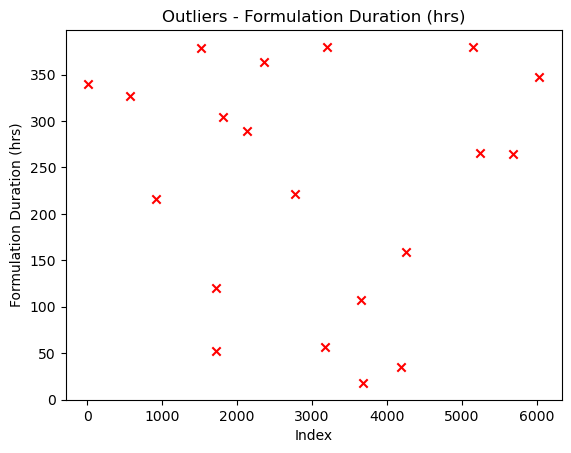

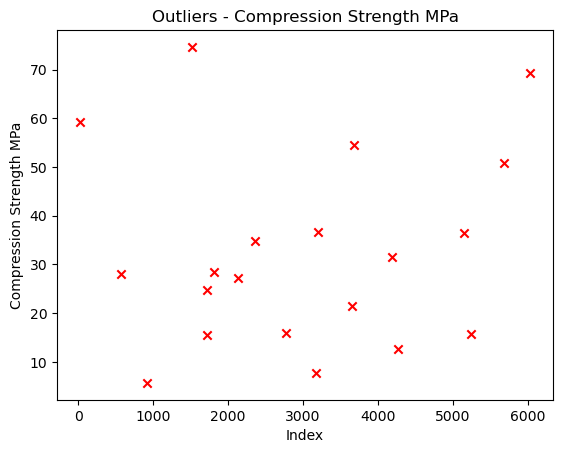

In [24]:
### Plotting Outliers Graph 

column_names = outliers.columns

# Iterate over the columns and plot the outliers
for column in column_names:
    plt.scatter(outliers.index, outliers[column], c='red', marker='x')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Outliers - {column}')
    plt.show()

In [25]:
outlier_indices = outliers.index

# Removing the outliers from the original DataFrame
df = df.drop(outlier_indices)


In [26]:
df.head()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                  486.42                  180.60               21.26   
1                  133.32                  260.14              185.60   
2                  559.97                    2.84              111.76   
3                  391.43                  351.05               76.39   
4                  394.78                  352.61              194.35   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0          201.66             16.11              1151.17              708.50   
1          175.99              6.27              1090.57             1010.25   
2          295.23             11.95              1024.93              810.69   
3          299.14             19.00              1134.88              881.34   
4          235.54             17.02              1098.24              781.01   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
1                       28.86                     59.80  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07

In [27]:
df.shape

(5985, 9)

In [28]:
### Checking the P=Value of my dataframe 

dependent_col = df.columns[-1]
p_values = {}
for col in df.columns[:-1]:
    statistic, p_value = mannwhitneyu(df[col], df[dependent_col])
    p_values[col] = p_value
for col, p_value in p_values.items():
    print(f"{col}: p-value = {p_value}")


Material Quantity (gm): p-value = 0.0
Additive Catalyst (gm): p-value = 0.0
Ash Component (gm): p-value = 0.0
Water Mix (ml): p-value = 0.0
Plasticizer (gm): p-value = 0.0
Moderate Aggregator: p-value = 0.0
Refined Aggregator: p-value = 0.0
Formulation Duration (hrs): p-value = 0.0


In [29]:
df.shape

(5985, 9)

## Checking for outliers using ODIN Outlier Detection method becasue dataset is still too much noisy 

In [30]:
def odin_outlier_detection(df, k=5, threshold=0.95):
    # Converting DataFrame to numpy array
    X = df.values
    
    # Fitting the k-nearest neighbors model
    knn = NearestNeighbors(n_neighbors=k+1)
    knn.fit(X)
    
    # Calculating the distances to k nearest neighbors for each data point
    distances, _ = knn.kneighbors(X)
    mean_distances = np.mean(distances[:, 1:], axis=1)
    
    # Calculating the threshold for outlier detection
    threshold_value = np.percentile(mean_distances, threshold * 100)
    
    # Detecting outliers based on the threshold
    outliers = df[mean_distances > threshold_value]
    
    return outliers
detected_outliers = odin_outlier_detection(df, k=5, threshold=0.95)

detected_outliers

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
1                     133.32                  260.14              185.60   
10                    129.34                   63.66               33.53   
21                    631.27                  393.25              242.56   
32                    593.24                   26.84              240.13   
35                    390.01                  419.97               16.77   
...                      ...                     ...                 ...   
6022                  220.79                   54.71               37.30   
6033                  273.14                  356.66              237.04   
6072                  426.22                  280.03               36.52   
6094                  192.26                   37.70              109.28   
6134                  188.78                  162.30              142.65   

      Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  \
1             175.99              6.27              1090.57   
10            185.94              2.49               885.38   
21            228.79             17.22               828.00   
32            169.51             10.68               951.34   
35            154.14              3.39              1064.49   
...              ...               ...                  ...   
6022          188.70             23.98               950.72   
6033          221.11              2.96               847.03   
6072          295.37             11.52               835.62   
6094          149.77              4.34               852.00   
6134          163.66             15.98              1003.82   

      Refined Aggregator  Formulation Duration (hrs)  Compression Strength MPa  
1                1010.25                       28.86                     59.80  
10                892.64                      268.95                     61.96  
21                947.59                      253.14                     35.36  
32                754.62                       29.01                     52.04  
35                833.73                       81.66                     46.11  
...                  ...                         ...                       ...  
6022              946.09                      318.81                     25.91  
6033              771.72                       43.83                     60.45  
6072             1014.04                      232.32                     64.32  
6094              612.93                      293.36                     55.60  
6134             1002.47                      357.91                     50.61  

[300 rows x 9 columns]

In [31]:
### Dropping outliers df from my orginal df 

df = df.drop(detected_outliers.index)

In [32]:
df.shape

(5685, 9)

In [33]:
df.head()

Material Quantity (gm)  Additive Catalyst (gm)  Ash Component (gm)  \
0                  486.42                  180.60               21.26   
2                  559.97                    2.84              111.76   
3                  391.43                  351.05               76.39   
4                  394.78                  352.61              194.35   
5                  245.92                   25.23              211.33   

   Water Mix (ml)  Plasticizer (gm)  Moderate Aggregator  Refined Aggregator  \
0          201.66             16.11              1151.17              708.50   
2          295.23             11.95              1024.93              810.69   
3          299.14             19.00              1134.88              881.34   
4          235.54             17.02              1098.24              781.01   
5          189.96             10.48              1056.28             1001.52   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07  
5                      274.82                     51.70

In [34]:
df.corr()

Material Quantity (gm)  Additive Catalyst (gm)  \
Material Quantity (gm)                    1.000000                0.006634   
Additive Catalyst (gm)                    0.006634                1.000000   
Ash Component (gm)                       -0.023890                0.064215   
Water Mix (ml)                            0.008001                0.027525   
Plasticizer (gm)                          0.048644                0.145885   
Moderate Aggregator                      -0.008809               -0.031689   
Refined Aggregator                       -0.021396                0.007326   
Formulation Duration (hrs)                0.078509                0.176665   
Compression Strength MPa                  0.144643                0.193108   

                            Ash Component (gm)  Water Mix (ml)  \
Material Quantity (gm)               -0.023890        0.008001   
Additive Catalyst (gm)                0.064215        0.027525   
Ash Component (gm)                    1.000000       -0.014881   
Water Mix (ml)                       -0.014881        1.000000   
Plasticizer (gm)                      0.165408       -0.026391   
Moderate Aggregator                  -0.006310       -0.036272   
Refined Aggregator                    0.041607       -0.063526   
Formulation Duration (hrs)            0.109957        0.031651   
Compression Strength MPa              0.104056       -0.029685   

                            Plasticizer (gm)  Moderate Aggregator  \
Material Quantity (gm)              0.048644            -0.008809   
Additive Catalyst (gm)              0.145885            -0.031689   
Ash Component (gm)                  0.165408            -0.006310   
Water Mix (ml)                     -0.026391            -0.036272   
Plasticizer (gm)                    1.000000            -0.023886   
Moderate Aggregator                -0.023886             1.000000   
Refined Aggregator                  0.051793            -0.007760   
Formulation Duration (hrs)          0.163115             0.010449   
Compression Strength MPa            0.225399            -0.031302   

                            Refined Aggregator  Formulation Duration (hrs)  \
Material Quantity (gm)               -0.021396                    0.078509   
Additive Catalyst (gm)                0.007326                    0.176665   
Ash Component (gm)                    0.041607                    0.109957   
Water Mix (ml)                       -0.063526                    0.031651   
Plasticizer (gm)                      0.051793                    0.163115   
Moderate Aggregator                  -0.007760                    0.010449   
Refined Aggregator                    1.000000                    0.009486   
Formulation Duration (hrs)            0.009486                    1.000000   
Compression Strength MPa             -0.006217                    0.289186   

                            Compression Strength MPa  
Material Quantity (gm)                      0.144643  
Additive Catalyst (gm)                      0.193108  
Ash Component (gm)                          0.104056  
Water Mix (ml)                             -0.029685  
Plasticizer (gm)                            0.225399  
Moderate Aggregator                        -0.031302  
Refined Aggregator                         -0.006217  
Formulation Duration (hrs)                  0.289186  
Compression Strength MPa                    1.000000

## Correlation betweeb independent variables and dependent variables are not positive or linear, so using some extra feature extraction technique for that

## Applying Variance Inflation Factor Method to choose the required columns as per VIF corelation computation

In [35]:
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display the VIF data
print(vif_data)

                     Variable        VIF
0      Material Quantity (gm)   7.693619
1      Additive Catalyst (gm)   3.399276
2          Ash Component (gm)   3.451594
3              Water Mix (ml)  25.765958
4            Plasticizer (gm)   3.559063
5         Moderate Aggregator  53.201553
6          Refined Aggregator  40.473795
7  Formulation Duration (hrs)   3.853924
8    Compression Strength MPa  14.843306


#### Dropping all the columns whoes VIF is greater than 5 because as per VIF there correlation with other columns are sufficient and will get the feature from other columns , 
#### so for dimensonality reduction and for complexity reductuion, dropping thoes columns.

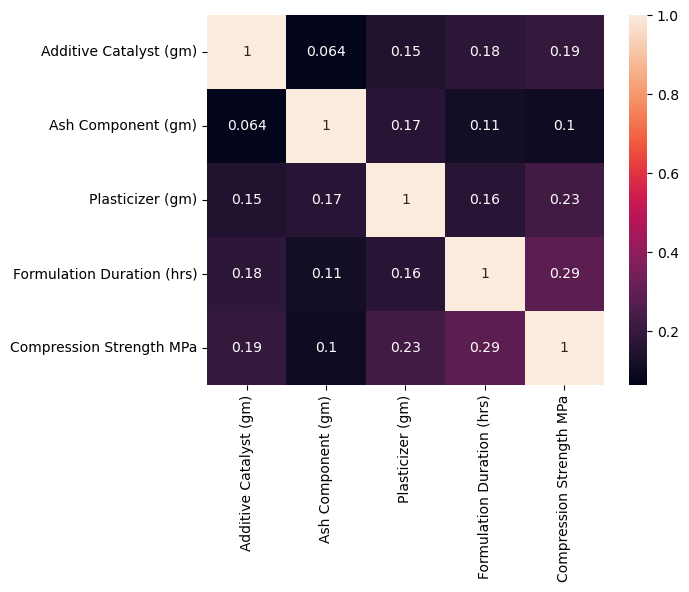

In [36]:
df.drop(["Material Quantity (gm)" ,"Water Mix (ml)","Moderate Aggregator","Refined Aggregator"],axis=1,inplace=True)

sns.heatmap(df.corr(),annot = True)
plt.show()

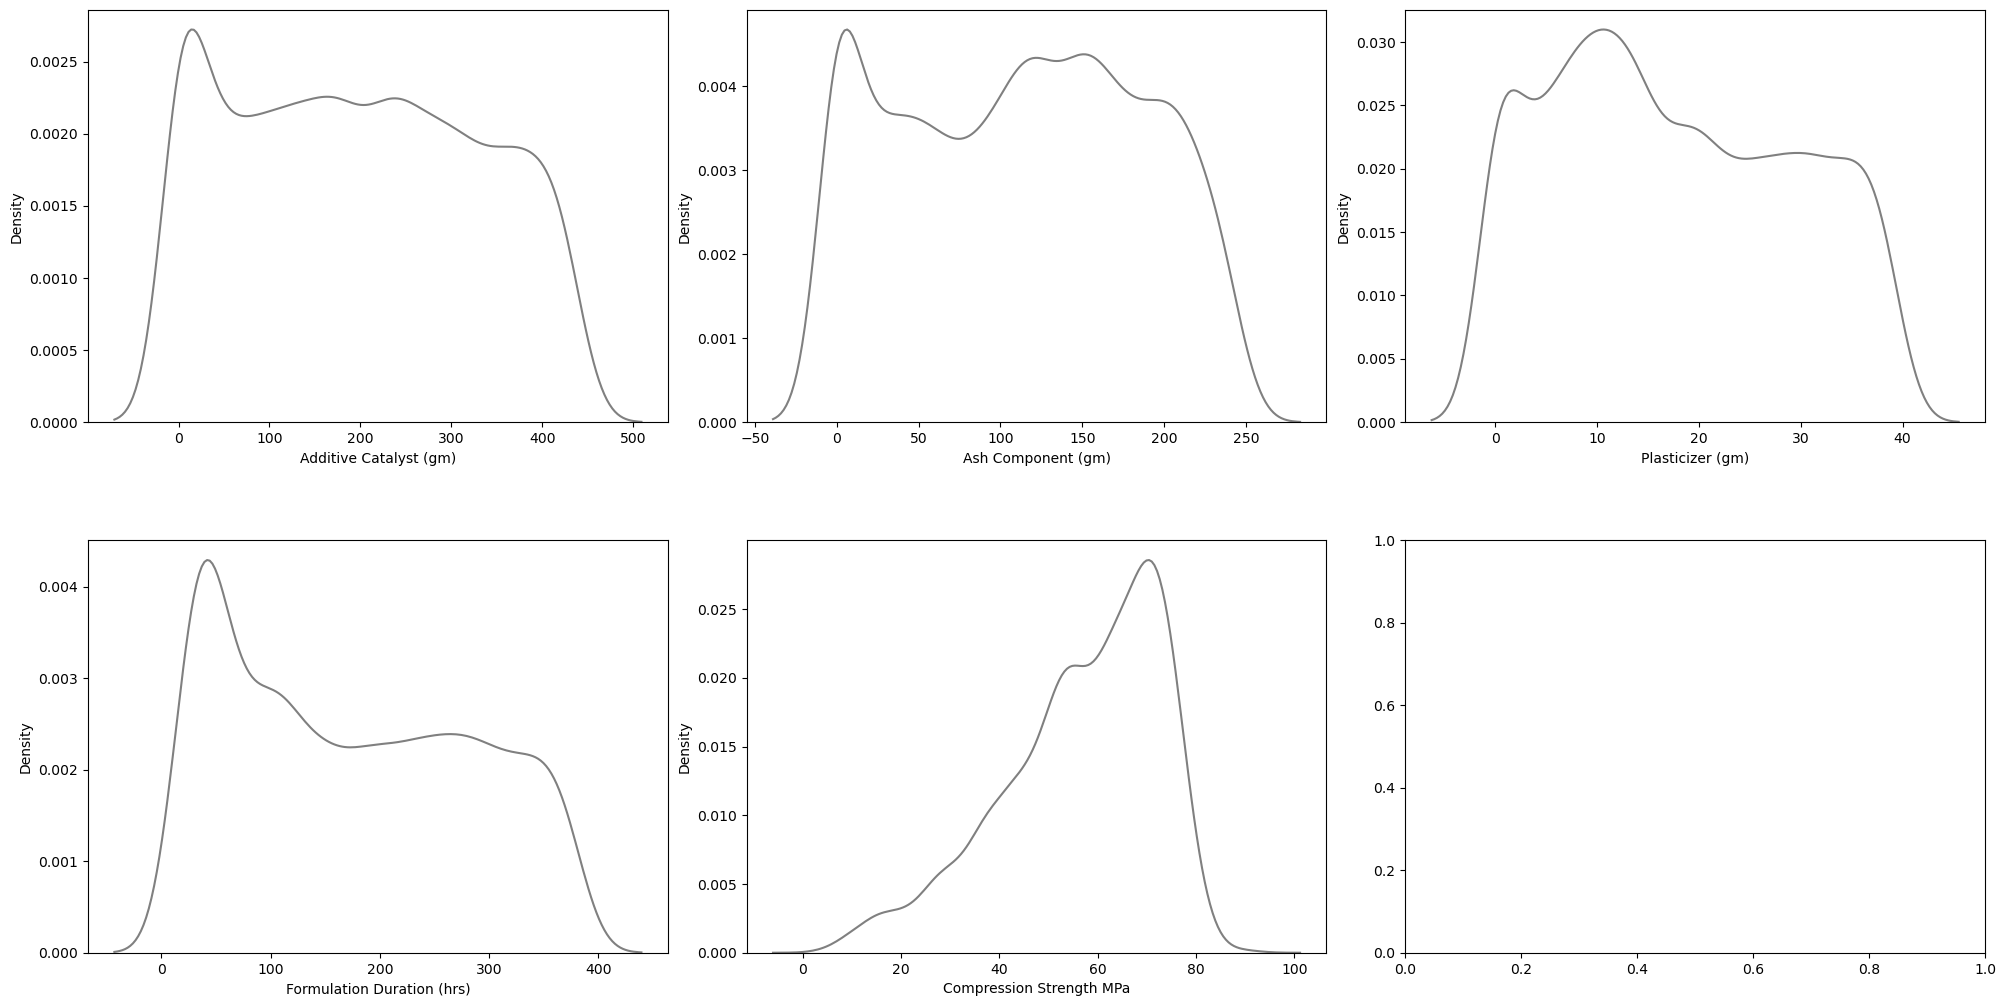

In [37]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in df.columns:
    #if col != "concrete_compressive_strength":
        sns.kdeplot(x=col, data=df, ax=ax[index], color="Grey")
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

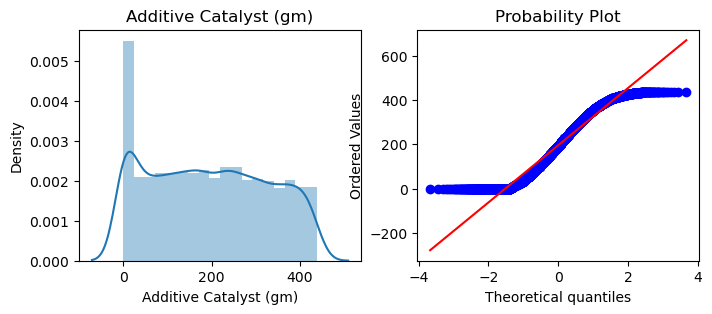

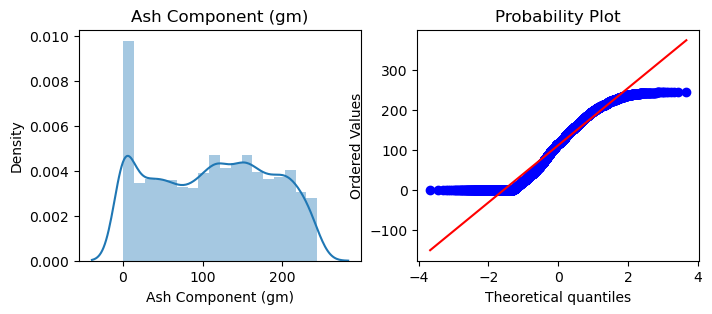

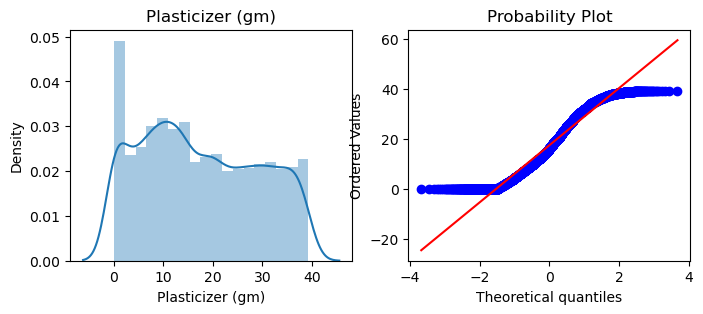

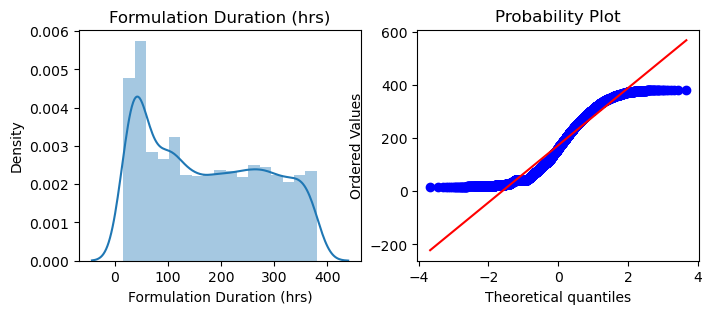

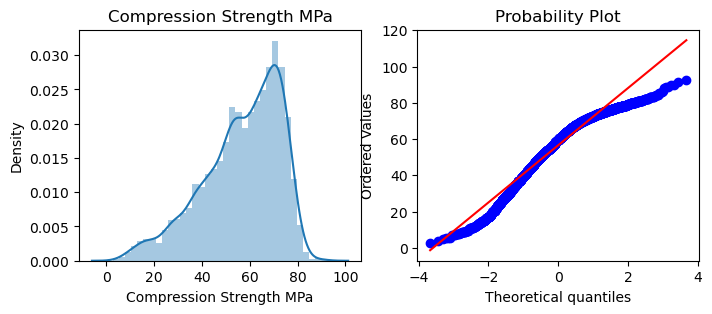

In [38]:
### Checking every single variables data distribution using scatter plot and also using QQ plot to understand column distribution 

for col in df.columns:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col], dist="norm" , plot = plt)
    plt.show()

In [39]:
df.head()

Additive Catalyst (gm)  Ash Component (gm)  Plasticizer (gm)  \
0                  180.60               21.26             16.11   
2                    2.84              111.76             11.95   
3                  351.05               76.39             19.00   
4                  352.61              194.35             17.02   
5                   25.23              211.33             10.48   

   Formulation Duration (hrs)  Compression Strength MPa  
0                      344.43                     79.89  
2                      237.68                     77.86  
3                      208.81                     71.74  
4                      266.84                     76.07  
5                      274.82                     51.70

In [40]:
### Checking QQ plot mathematical distribution 

for col in df.columns:
    # Generate QQ plot
    _, qq_values = stats.probplot(df[col], dist="norm")
    
    # Print the QQ plot values
    print(f"QQ Plot values for {col}:")
    for i, val in enumerate(qq_values):
        print(f"Quantile {i+1}: {val}")


QQ Plot values for Additive Catalyst (gm):
Quantile 1: 129.12762457248112
Quantile 2: 196.10631838170627
Quantile 3: 0.973677723576057
QQ Plot values for Ash Component (gm):
Quantile 1: 71.39137401888087
Quantile 2: 111.72574670184696
Quantile 3: 0.9738946172439258
QQ Plot values for Plasticizer (gm):
Quantile 1: 11.411821773256015
Quantile 2: 17.5190290237467
Quantile 3: 0.9742694358902949
QQ Plot values for Formulation Duration (hrs):
Quantile 1: 107.5944060579417
Quantile 2: 173.16170448548812
Quantile 3: 0.9650347985609652
QQ Plot values for Compression Strength MPa:
Quantile 1: 15.787303568029825
Quantile 2: 56.62684608619173
Quantile 3: 0.9739175840008947


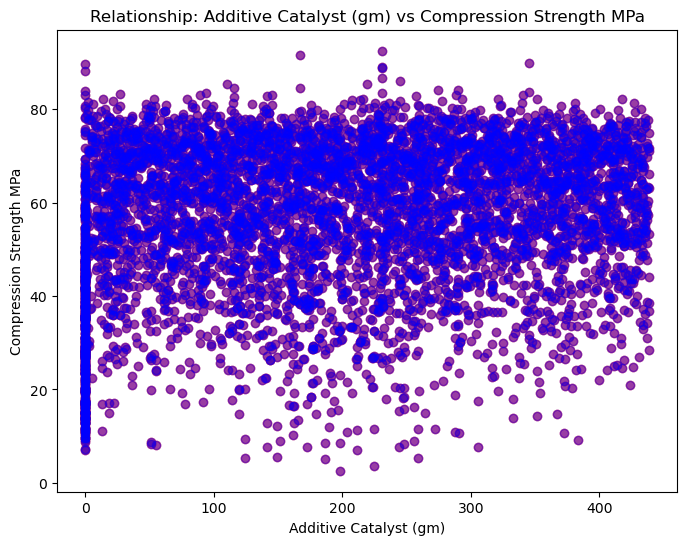

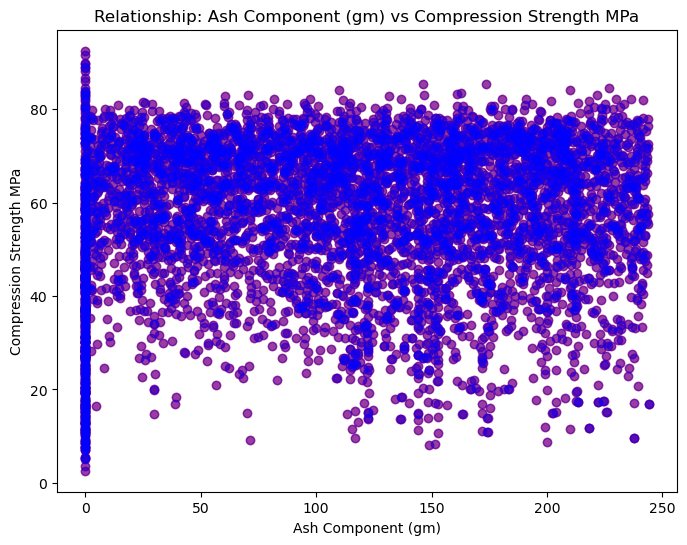

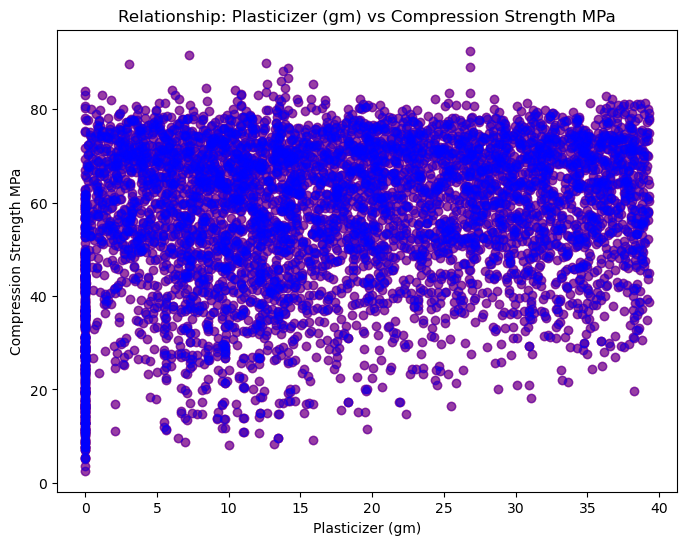

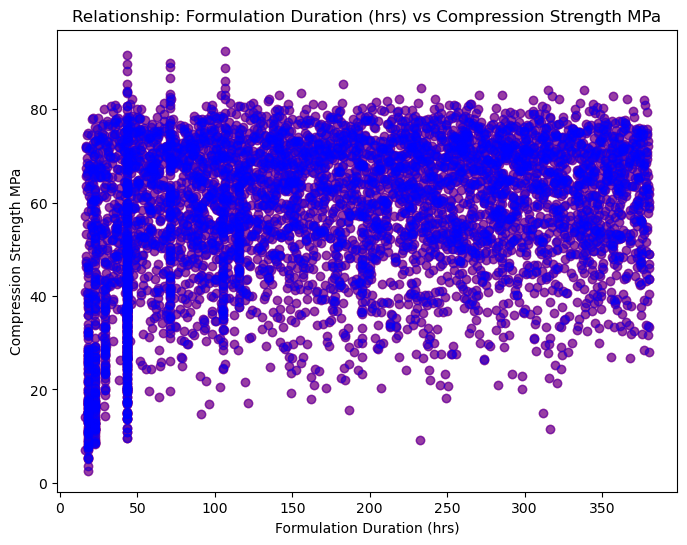

In [41]:
### Checking every independnt variables relationship with dependnet variable using scatter plot to understand the data distribution

independent_vars = df.columns[:-1]
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[var], df[df.columns[-1]], color="red", alpha=0.6)
    plt.scatter(df[var], df[df.columns[-1]], color="blue", alpha=0.4)
    plt.xlabel(var)
    plt.ylabel(df.columns[-1])
    plt.title(f"Relationship: {var} vs {df.columns[-1]}")
    plt.show()


### Data is too noisy and disturbed , so applying power transformer(Yeo-Johnson)

In [42]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pt.fit_transform(df)
df = pd.DataFrame(df_transformed, columns=df.columns)


In [43]:
df

Additive Catalyst (gm)  Ash Component (gm)  Plasticizer (gm)  \
0                   0.079039           -1.203326          0.033098   
1                  -1.794320            0.159845         -0.323093   
2                   1.062259           -0.288485          0.260536   
3                   1.070180            1.036127          0.106243   
4                  -1.336188            1.197304         -0.459493   
...                      ...                 ...               ...   
5680               -1.105293            1.116586          0.825145   
5681                0.747659           -0.269029          0.750922   
5682               -1.375171           -1.276709          1.333281   
5683                0.659526            0.884440          0.188854   
5684                0.608400            0.766386         -0.445270   

      Formulation Duration (hrs)  Compression Strength MPa  
0                       1.346807                  1.692490  
1                       0.674297                  1.513767  
2                       0.466249                  0.997635  
3                       0.871438                  1.359272  
4                       0.923404                 -0.448316  
...                          ...                       ...  
5680                   -0.524995                  0.238788  
5681                   -0.454350                 -0.286204  
5682                    1.099402                 -0.132011  
5683                    1.516463                 -0.020356  
5684                    1.440589                  0.031562  

[5685 rows x 5 columns]

In [44]:
df.describe().T

count          mean       std       min  \
Additive Catalyst (gm)      5685.0 -1.774795e-16  1.000088 -1.915322   
Ash Component (gm)          5685.0  2.140377e-16  1.000088 -1.868285   
Plasticizer (gm)            5685.0 -4.274505e-16  1.000088 -1.850561   
Formulation Duration (hrs)  5685.0  2.249740e-16  1.000088 -1.819712   
Compression Strength MPa    5685.0  1.162365e-16  1.000088 -2.246409   

                                 25%       50%       75%       max  
Additive Catalyst (gm)     -0.714264  0.153670  0.828166  1.485790  
Ash Component (gm)         -0.736303  0.203202  0.818428  1.495467  
Plasticizer (gm)           -0.730630  0.035533  0.865143  1.592157  
Formulation Duration (hrs) -0.860588  0.086890  0.892373  1.547236  
Compression Strength MPa   -0.750743  0.079098  0.830832  2.886355

In [45]:
### Spliting dependent and independnt variables 

In [46]:
X = df.drop("Compression Strength MPa", axis=1)  # independent variables
y = df['Compression Strength MPa']

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
          ("num", numeric_transformer, num_features)
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [50]:
linear = LinearRegression()

In [51]:
from sklearn.metrics import r2_score
linear.fit(X_train,y_train)
y_hat= linear.predict(X_test)
print(r2_score(y_test,y_hat))

0.12232523926266659


### Tried diffrent ml techniques is not working fine --> so applying data augumentation method to increase the size of data for better result

In [52]:
X = pd.DataFrame(X)

In [53]:
num_augmentations = 5  # Number of augmented samples to generate for each original sample

augmented_X = []
augmented_y = []

for i in range(len(X)):
    for _ in range(num_augmentations):
        augmented_X.append(X.iloc[i].values + np.random.normal(0, 0.1, size=X.shape[1]))
        augmented_y.append(y.iloc[i] + np.random.normal(0, 0.1))
augmented_X = np.vstack((X.values, augmented_X))
augmented_y = np.concatenate((y.values, augmented_y))
augmented_df = pd.DataFrame(data=augmented_X, columns=X.columns)
augmented_df['Compression Strength MPa'] = augmented_y
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)
X_augmented = augmented_df.drop("Compression Strength MPa", axis=1)
y_augmented = augmented_df['Compression Strength MPa']

In [54]:
### Scaling the data 

In [55]:
X = scaler.fit_transform(X_augmented)
X = pd.DataFrame(X_augmented)
X_augmented

0         1         2         3
0     -1.166009  0.504664  1.365486  1.163846
1      0.378186 -2.075760  0.723312 -1.355794
2      1.179920 -0.343866  0.060043  0.783649
3      0.534453 -0.094563  1.198656  1.039495
4      0.271733  0.512521 -1.400336 -0.146495
...         ...       ...       ...       ...
34105  0.561149 -0.260772  0.624544 -0.149114
34106  0.807187  1.212723  1.090842 -0.069453
34107  0.189137  0.737214 -0.935010  1.196128
34108  0.134562  1.344458 -1.663044 -0.685281
34109  0.431438  0.636998 -1.511396  0.075836

[34110 rows x 4 columns]

In [56]:
### Checking the Augumented dataset shape 
X_augmented.shape

(34110, 4)

In [57]:
pd.DataFrame(X_augmented)

0         1         2         3
0     -1.166009  0.504664  1.365486  1.163846
1      0.378186 -2.075760  0.723312 -1.355794
2      1.179920 -0.343866  0.060043  0.783649
3      0.534453 -0.094563  1.198656  1.039495
4      0.271733  0.512521 -1.400336 -0.146495
...         ...       ...       ...       ...
34105  0.561149 -0.260772  0.624544 -0.149114
34106  0.807187  1.212723  1.090842 -0.069453
34107  0.189137  0.737214 -0.935010  1.196128
34108  0.134562  1.344458 -1.663044 -0.685281
34109  0.431438  0.636998 -1.511396  0.075836

[34110 rows x 4 columns]

In [58]:
y_augmented.values

array([-1.47949557,  1.78597669,  0.08286825, ..., -0.13052136,
        1.24037662,  0.58054676])

In [59]:
### Dataset is still not linear or properly distributed --> so applying polynomial regression technique

degree = 2
poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_transformer.fit_transform(X_augmented)
poly_feature_names = [f"X{i}" for i in range(X_poly.shape[1])]
X_augmented = pd.DataFrame(data=X_poly, columns=poly_feature_names)

In [60]:
### Scaling the data

scaler = StandardScaler()
scaler

StandardScaler()

In [61]:
X = scaler.fit_transform(X_augmented)
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0     -1.161871  0.502372  1.359835  1.159615  0.324896 -0.638081 -1.668090   
1      0.376511 -2.067630  0.720251 -1.350110 -0.797962 -0.821001  0.077593   
2      1.175227 -0.342731  0.059658  0.780914  0.355015 -0.468068 -0.112067   
3      0.532190 -0.094435  1.193678  1.035753 -0.666330 -0.137553  0.421056   
4      0.270459  0.510197 -1.394830 -0.145569 -0.861819  0.039068 -0.534391   
...         ...       ...       ...       ...       ...       ...       ...   
34105  0.558786 -0.259973  0.621881 -0.148178 -0.639334 -0.226689  0.149560   
34106  0.803897  1.207571  1.086298 -0.068830 -0.328601  0.820354  0.645510   
34107  0.188173  0.733983 -0.931381  1.191770 -0.896954  0.039221 -0.343821   
34108  0.133804  1.338775 -1.656478 -0.682235 -0.913259  0.077818 -0.387739   
34109  0.429562  0.634172 -1.505441  0.075886 -0.758169  0.165205 -0.788475   

             7         8         9         10        11        12        13  
0     -1.509744 -0.703300  0.378872  0.390599  0.836814  1.349580  0.389953  
1     -0.706661  3.080995 -1.509174  2.451878 -0.473827 -1.144635  0.934057  
2      0.660531 -0.830662 -0.232877 -0.402480 -0.981498 -0.147179 -0.443045  
3      0.309473 -0.932690 -0.312778 -0.244042  0.418838  1.016466  0.081712  
4     -0.256822 -0.695840 -0.833676 -0.222552  0.930994  0.006256 -1.109780  
...         ...       ...       ...       ...       ...       ...       ...  
34105 -0.298548 -0.877560 -0.355455 -0.117064 -0.603902 -0.283232 -1.108909  
34106 -0.272282  0.431786  0.925133 -0.231017  0.177653 -0.266377 -1.128497  
34107 -0.003774 -0.433721 -0.809199  0.663145 -0.130806 -1.278310  0.475663  
34108 -0.306668  0.746239 -2.142224 -1.005846  1.717330  0.913253 -0.605604  
34109 -0.187838 -0.562274 -1.044892 -0.108343  1.246961 -0.304089 -1.127454  

[34110 rows x 14 columns]

In [62]:
X_augmented = X

In [63]:
X_augmented

array([[-1.16187114,  0.50237179,  1.35983487, ...,  0.83681433,
         1.34958017,  0.38995343],
       [ 0.3765108 , -2.06762991,  0.72025115, ..., -0.473827  ,
        -1.1446352 ,  0.93405687],
       [ 1.175227  , -0.34273128,  0.05965775, ..., -0.98149844,
        -0.14717855, -0.44304536],
       ...,
       [ 0.18817343,  0.73398287, -0.93138103, ..., -0.13080647,
        -1.27830986,  0.47566312],
       [ 0.13380403,  1.33877456, -1.65647789, ...,  1.71733036,
         0.9132532 , -0.60560443],
       [ 0.4295624 ,  0.63417154, -1.50544137, ...,  1.24696107,
        -0.30408867, -1.12745396]])

In [64]:
### Spliting the dataset 

In [65]:
X_augmented_train, X_augmented_test, y_augmented_train, y_augmented_test = train_test_split(X_augmented, y_augmented, test_size=0.30, random_state=42)

In [66]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_augmented_train.shape)
print('Shape of the training output data:', y_augmented_train.shape)
print('Shape of the test input data:', X_augmented_test.shape)
print('Shape of the test output data:', y_augmented_test.shape)

Shape of the training input data: (23877, 14)
Shape of the training output data: (23877,)
Shape of the test input data: (10233, 14)
Shape of the test output data: (10233,)


In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_augmented_train = pca.fit_transform(X_augmented_train)
X_augmented_test = pca.transform(X_augmented_test)

print(X_augmented_train.shape)  
print(X_augmented_test.shape)   


(23877, 8)
(10233, 8)


In [68]:
### Applying linear regression model 

lr = LinearRegression()
lr.fit(X_augmented_train,y_augmented_train)
y_pred = lr.predict(X_augmented_test)
y_pred

array([0.13245699, 0.33101213, 0.25567721, ..., 0.14053583, 0.01184582,
       0.10274718])

In [69]:
## Comparing Actual and Predicted Value 

pd.DataFrame(data={"Actual":y_augmented_test, "Prediction": y_pred})

Actual  Prediction
31014 -0.539900    0.132457
28596  0.987786    0.331012
11570 -0.977981    0.255677
6179   0.869708   -0.214368
17797  0.865957    0.342824
...         ...         ...
15736  0.677187    0.235803
10454 -1.199422    0.249713
14190 -0.462686    0.140536
11833 -0.921379    0.011846
20736 -0.172118    0.102747

[10233 rows x 2 columns]

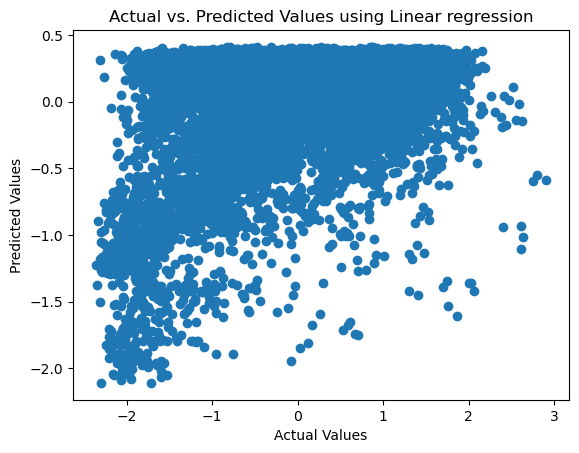

In [70]:
# Plot scatter plot of Actual vs. Prediction
plt.scatter(y_augmented_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values using Linear regression")
plt.show()

In [71]:
from sklearn.metrics import r2_score
print(r2_score(y_augmented_test,y_pred))

0.19447509788047257


In [72]:
### Applying Gradient Boosting Regressor Model 

GB_model = GradientBoostingRegressor()

GB_model.fit(X_augmented_train,y_augmented_train)
y_pred_GB = GB_model.predict(X_augmented_test)
GB_r2 = r2_score(y_augmented_test, y_pred_GB)
GB_r2

0.26777960977430326

In [73]:
### Applying Random Forest Regressor Model 

rf_model_1 = RandomForestRegressor()
rf_model_1.fit(X_augmented_train,y_augmented_train)
y_pred_rf = rf_model_1.predict(X_augmented_test)
rf_r2_1 = r2_score(y_augmented_test, y_pred_rf)
rf_r2_1

0.4554289067239159

### Checking Accuracy with Ensemble regression model technique 

In [74]:
### Defining the model  

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
svr_model = SVR()
knn_model = KNeighborsRegressor()
rf_model = RandomForestRegressor()

In [75]:
### Crearting an ensemble of all non linear model 

ensemble_model = VotingRegressor([
    ('poly', poly_model),
    ('svr', svr_model),
    ('knn', knn_model),
    ('rf', rf_model)
])


In [76]:
### Fitting & Predicting 

ensemble_model.fit(X_augmented_train,y_augmented_train)
ensemble_preds = ensemble_model.predict(X_augmented_test)

In [77]:
### Checking R2 Score 

ensemble_r2 = r2_score(y_augmented_test, ensemble_preds)
ensemble_r2

0.424913491256631

# Taking Random Forest Model as accuracy as compared to other model is better -->48%

In [78]:
import pickle

In [79]:
### Defining the preprocessing steps 

preprocessing_steps = [
    ('power_transformer', PowerTransformer()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=8))
]

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
pipeline = Pipeline(steps=preprocessing_steps + [('model', RandomForestRegressor())])

In [83]:
pipeline.fit(X_augmented_train,y_augmented_train)

Pipeline(steps=[('power_transformer', PowerTransformer()),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('model', RandomForestRegressor())])

In [84]:
with open('model_live.pkl', 'wb') as file:
    pickle.dump(pipeline, file)